 ### Load the drive containing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Defining function to group less represented parties under the 'Others' category

In [3]:
def creating_category_others(data):
  # Using 0.99 quantile to categorize 'Others'
  threshold_value = data['count'].quantile(0.99)
  values_below_thresh = data['count'] < threshold_value
  data.loc[values_below_thresh,'Label'] = 'Others'
  return data

## Loading datasets

In [4]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2017.csv.bz2', compression='bz2', usecols=['speaker','qids','quoteID'])

# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet', columns=['nationality','party','id'])

# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [5]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

# Removing speakers without any known party (i.e. with 'party' == None)
politicians = speakers[~(speakers['party'].isna())]

## Computing the number of speakers per party from sport quotes

Only keeping the first qid for the 'party' feature. It is known, that it is not correct because we should select the party in which the speaker was at the time of the quote. This will be solved for Milestone 3, as this requires new speaker_features dataset to obtain this information. 

In [6]:
# Only keeping the first qid in the 'party' feature (with str.get(0))
# Counts the occurences of each party and adding the corresponding party label by merging qid_labels
party_speaker_counts_label = pd.DataFrame(pd.value_counts(politicians['party'].str.get(0))).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_speaker_counts_label = creating_category_others(party_speaker_counts_label)

## Computing the number of quotes per party from sport quotes

In [7]:
# Selecting quotes from a speaker with a party and merging the speaker_attributes dataset
dataset_politicians_attributes = dataset[dataset['qids'].isin(politicians['id'])].merge(speaker_attributes, left_on='qids', right_on='id')
# Only keeping the first qid in the 'party' feature (with str.get(0))
dataset_politicians_attributes['party'] = dataset_politicians_attributes['party'].str.get(0)

# Counts the occurences of each party and add the corresponding party label 
party_quotes_counts_label = pd.DataFrame(pd.value_counts(dataset_politicians_attributes['party'])).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_quotes_counts_label = creating_category_others(party_quotes_counts_label)

## Plots : pie plots and bar plots

Speaker's party distribution

Text(0.6, 0.92, "Speaker's party distribution of sport quotes for year 2017")

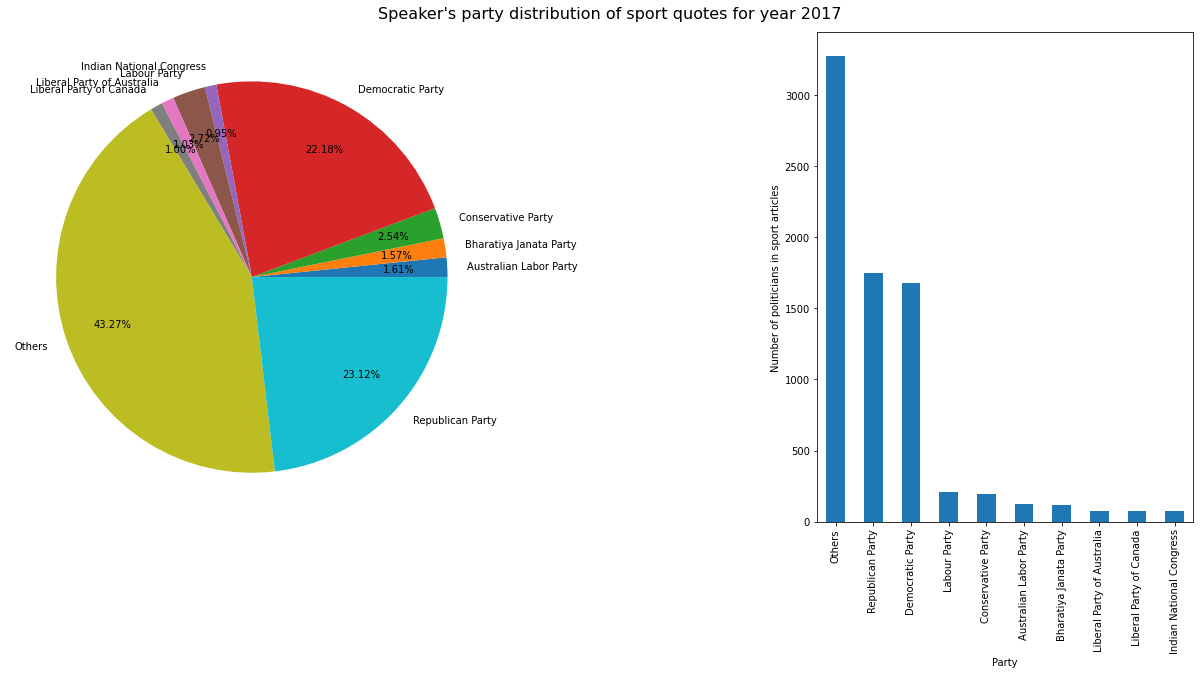

In [8]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_speaker_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0], pctdistance=0.75, ylabel='')
party_speaker_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1], ylabel='Number of politicians in sport articles', xlabel='Party')

plt.subplots_adjust(wspace=0)
fig.suptitle('Speaker\'s party distribution of sport quotes for year 2017', fontsize=16, x=0.6, y=0.92)

Quote's party distribution

Text(0.6, 0.92, "Quote's party distribution of sport quotes for year 2017")

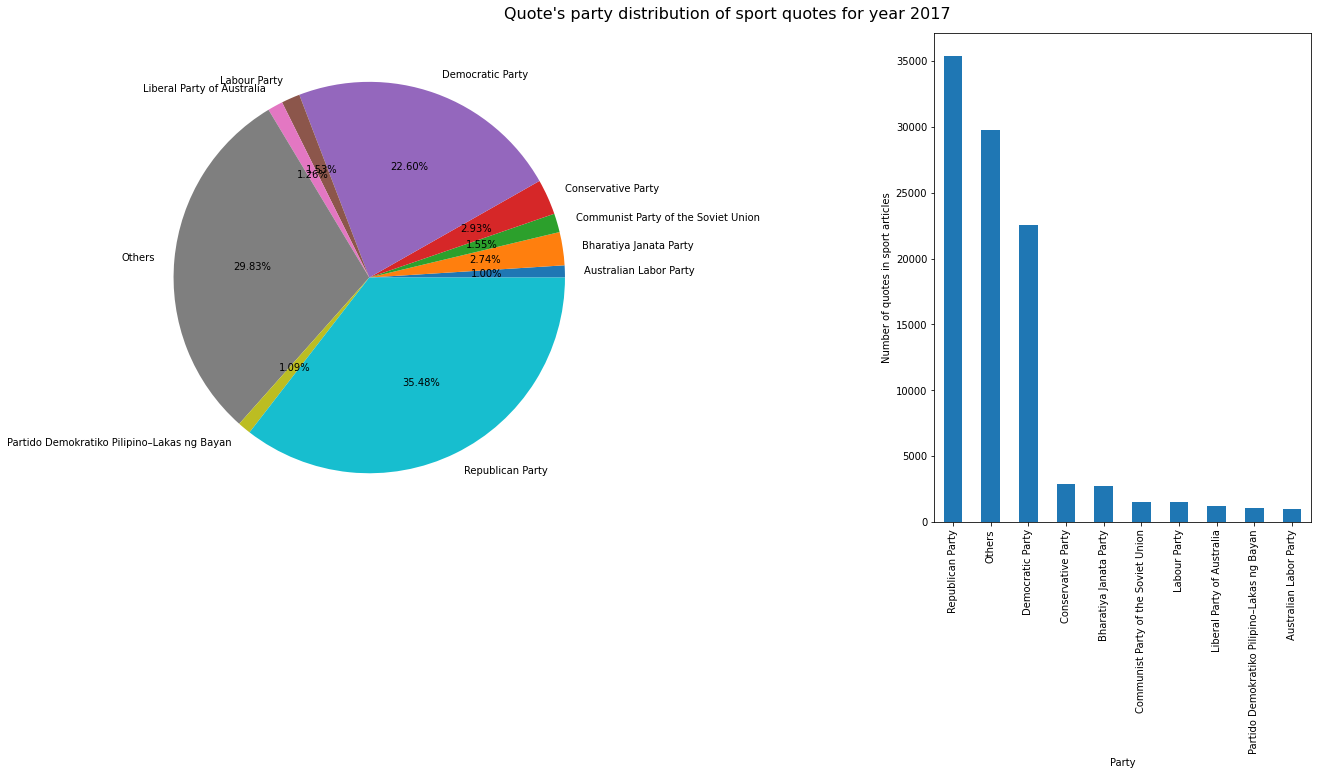

In [9]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_quotes_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0], ylabel='')
party_quotes_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1], ylabel='Number of quotes in sport articles', xlabel='Party')

plt.subplots_adjust(wspace=0)
fig.suptitle('Quote\'s party distribution of sport quotes for year 2017', fontsize=16, x=0.6, y=0.92)

## Data description and overview

Lengths of DataFrame (i.e. number of sample)

In [10]:
print('Number of sport quotes: {q_sport}\nNumber of political quotes: {q_pol}\nNumber of speakers: {spea}\nNumber of politicians (i.e. speakers with political party): {pol}\nNumber of different parties: {part}'\
      .format(q_sport=dataset.shape[0], spea=speakers.shape[0], pol=politicians.shape[0], part=party_speaker_counts_label.shape[0], q_pol=dataset_politicians_attributes.shape[0]))

Number of sport quotes: 4621534
Number of political quotes: 99647
Number of speakers: 91138
Number of politicians (i.e. speakers with political party): 7569
Number of different parties: 869


In [11]:
dataset.sample(5)

,quoteID,speaker,qids
131664,2017-11-10-134096,Josh Law,Q6289087
745189,2017-08-15-042659,None,
590662,2017-05-02-133722,None,
3106843,2017-09-24-088653,David Cutcliffe,Q5232741
638517,2017-05-09-086914,None,


In [12]:
speakers.sample(5)

,nationality,party,id
3692570,[Q30],None,Q16105026
4713781,[Q145],None,Q6838616
206744,[Q30],"[Q5255727, Q29552]",Q7823728
5865924,[Q30],None,Q7831846
2335483,"[Q843, Q129286]",None,Q2234596


In [13]:
politicians.sample(5)

,nationality,party,id
3407465,[Q17],[Q232595],Q253862
6793562,[Q30],[Q29552],Q55800
2281685,[Q30],[Q29552],Q399593
2392912,[Q408],[Q6625187],Q4756662
8065904,[Q30],[Q29552],Q5236524


In [14]:
party_speaker_counts_label.head(5)

,count,Label,Description
QID,,,
Q29468,1750,Republican Party,major political party in the United States
Q29552,1679,Democratic Party,political party in the United States
Q9630,206,Labour Party,political party in the United Kingdom
Q9626,192,Conservative Party,political party in the United Kingdom
Q216082,122,Australian Labor Party,political party in Australia


In [15]:
dataset_politicians_attributes.sample(5)

,quoteID,speaker,qids,nationality,party,id
65925,2017-11-14-078227,Xi Jinping,Q15031,[Q148],Q17427,Q15031
42217,2017-03-02-001969,Charles Picque,Q943256,[Q31],Q645787,Q943256
68029,2017-09-02-049111,Gov. Rick Scott,Q439729,[Q30],Q29468,Q439729
44997,2017-03-24-047250,Glen Taylor,Q4453744,[Q30],Q7314659,Q4453744
4283,2017-09-24-053964,President Donald Trump,Q22686,[Q30],Q29468,Q22686


In [16]:
party_quotes_counts_label.head(5)

,count,Label,Description
QID,,,
Q29468,35352,Republican Party,major political party in the United States
Q29552,22523,Democratic Party,political party in the United States
Q9626,2920,Conservative Party,political party in the United Kingdom
Q10230,2728,Bharatiya Janata Party,major political party in India
Q79854,1545,Communist Party of the Soviet Union,political party founded in 1912
